# Analiza kompresji obrazu metodą SVD 

Cel zadania: wczytać obraz `3.webp`, przekonwertować go do skali szarości i policzyć rozkład SVD.
Następnie zwizualizować wartości singularne i ich skumulowaną sumę (zarówno dla wartości `s` jak i dla `s**2`),
a także przekonwertować obraz przy użyciu kilku wartości r (liczby wartości singularnych).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = [12,6]

# Ścieżka do obrazu
img_path = '3.webp'


Oryginalny rozmiar obrazu (H,W,C): (628, 800, 3) dtype: uint8
Obraz po konwersji do skali szarości (H,W): (628, 800)


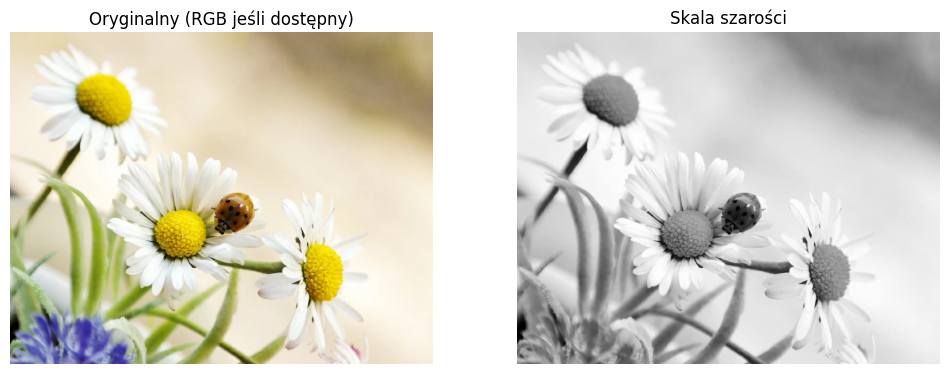

In [6]:
# Wczytanie obrazu i konwersja do skali szarości
img = Image.open(img_path)
A = np.array(img)
print('Oryginalny rozmiar obrazu (H,W,C):', A.shape, 'dtype:', A.dtype)
# Jeśli obraz jest kolorowy, jest uśredniony po kanałach RGB
if A.ndim == 3 and A.shape[2] >= 3:
    X = np.mean(A[..., :3], axis=-1)
else:
    X = A.astype(float)
X = X.astype(float)
print('Obraz po konwersji do skali szarości (H,W):', X.shape)

# Wyświetlenie ryginalnego obrazu i obrazu w skali szarości
fig, axes = plt.subplots(1,2)
axes[0].imshow(A)
axes[0].set_title('Oryginalny (RGB jeśli dostępny)')
axes[0].axis('off')
axes[1].imshow(X, cmap='gray')
axes[1].set_title('Skala szarości')
axes[1].axis('off')
plt.show()


## Obliczenie SVD i analiza wartości singularnych

Rozkład SVD macierzy obrazu w skali szarości oraz wizualizacja wartości singularnych.
Następnie skumulowana suma zarówno dla `s` (tak jak tutorialu), jak i dla `s**2`.

Liczba wartości singularnych (min(H,W)) = 628


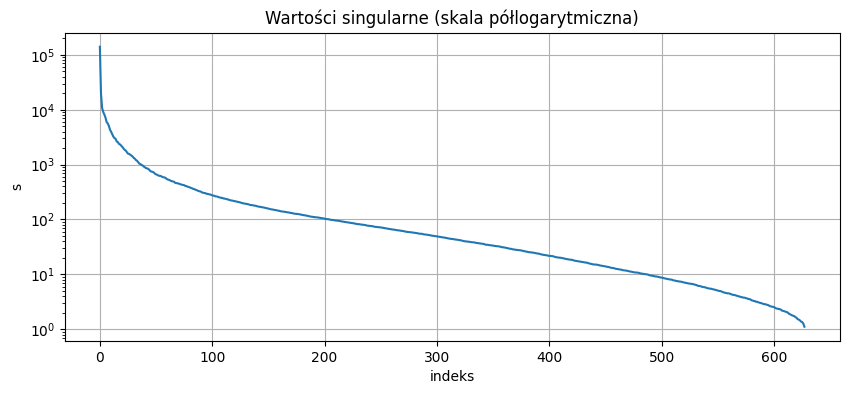

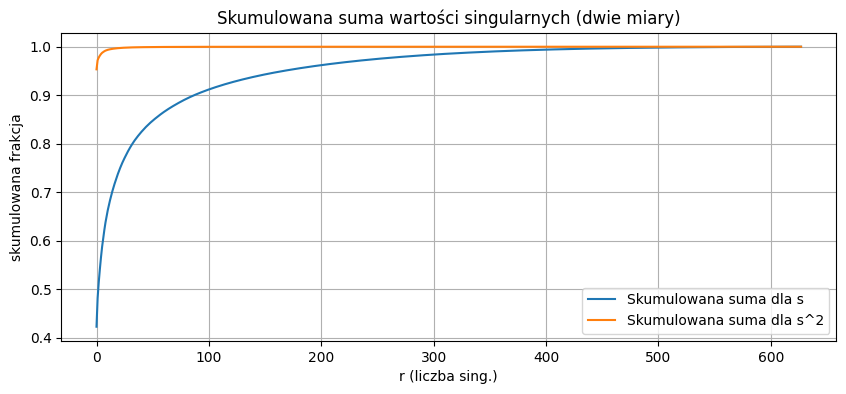

Najmniejsze r (suma s^2, energia/Frobenius) aby osiągnąć >=90%: 1
Najmniejsze r (suma s, jak w tutorialu) aby osiągnąć >=90%: 88


In [7]:
# Obliczenie SVD
U, s, VT = np.linalg.svd(X, full_matrices=False)
print('Liczba wartości singularnych (min(H,W)) =', s.size)

# Wykres wartości singularnych (log)
plt.figure(figsize=(10,4))
plt.semilogy(s)
plt.title('Wartości singularne (skala półlogarytmiczna)')
plt.xlabel('indeks')
plt.ylabel('s')
plt.grid(True)
plt.show()

# Skumulowana suma wartości s oraz s**2
s_sq = s**2
cum_sq = np.cumsum(s_sq) / np.sum(s_sq)
cum_raw = np.cumsum(s) / np.sum(s)

plt.figure(figsize=(10,4))
plt.plot(cum_raw, label='Skumulowana suma dla s')
plt.plot(cum_sq, label='Skumulowana suma dla s^2')
plt.title('Skumulowana suma wartości singularnych (dwie miary)')
plt.xlabel('r (liczba sing.)')
plt.ylabel('skumulowana frakcja')
plt.legend()
plt.grid(True)
plt.show()

# Znalezienie minimalnego r dla >=90%:
threshold = 0.90
r_sq = np.searchsorted(cum_sq, threshold) + 1
r_raw = np.searchsorted(cum_raw, threshold) + 1
print(f'Najmniejsze r (suma s^2, energia/Frobenius) aby osiągnąć >=90%: {r_sq}')
print(f'Najmniejsze r (suma s, jak w tutorialu) aby osiągnąć >=90%: {r_raw}')


## Rekonstrukcje obrazu przy różnych wartościach r

Obraz dla kilku wartości r — dzięki temu można porównać jakość wizualną i przestrzenną kompresję.

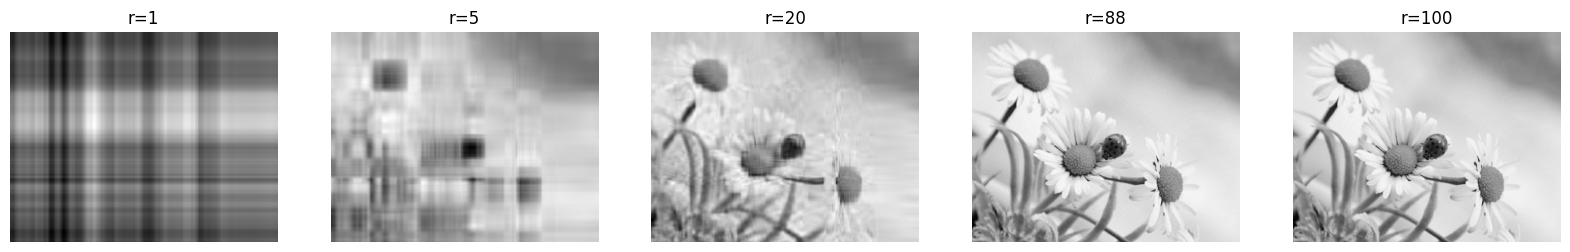

In [8]:
# Lista r - dopasuj do rozmiaru obrazu
r_list = [1, 5, 20, r_raw, 100] 
r_list = [r for r in r_list if r <= s.size]

fig, axes = plt.subplots(1, len(r_list), figsize=(4*len(r_list),4))
for i, r in enumerate(r_list):
    Xapprox = (U[:, :r] @ np.diag(s[:r]) @ VT[:r, :])
    ax = axes[i] if len(r_list) > 1 else axes
    ax.imshow(Xapprox, cmap='gray')
    ax.set_title(f'r={r}')
    ax.axis('off')
plt.show()

## Wnioski 

- Standardowa miara energii przy SVD to suma kwadratów singularnych (s^2). Przy tej miarze dla tego obrazu wystarczy r=1, aby zachować >=90% energii — oznacza to, że obraz ma bardzo silny dominujący składnik.